# Premier League 2023/2024 Player Performance Analysis

### Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas import DataFrame

### Loading the required datasets

In [32]:
player_stats = pd.read_csv('player_stats.csv')
player_stats = DataFrame(player_stats)
player_stats.head(10)

,Name,Twitter,Instagram,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Facebook
0,Max Aarons,https://twitter.com/maxaarons2,https://www.instagram.com/maxaarons2/,90.0,0.0,12.0,62.0,10.0,174.0,141.0,66%,1.0,13.0,73.0,165.0,63.0,4.0,407.0,404.0,383.0,96.0,41.0,111.0,1.0,0.0,4.0,"2,887",32.08,10.0,136.0,21%,7.0,94.0,16.0,0.0,68.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zach Abbott,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Terry Ablade,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.00,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Josh Acheampong,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tyler Adams,https://www.instagram.com/tyler.adams/,NaN,3.0,0.0,2.0,1.0,NaN,NaN,4.0,75%,NaN,0.0,4.0,2.0,2.0,NaN,7.0,11.0,4.0,2.0,2.0,3.0,NaN,0.0,0.0,69,23.00,0.0,1.0,0%,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tosin Adarabioyo,NaN,NaN,20.0,2.0,8.0,8.0,6.0,25.0,21.0,52%,0.0,2.0,25.0,80.0,47.0,0.0,43.0,83.0,51.0,1.0,57.0,28.0,0.0,0.0,0.0,"1,211",60.55,0.0,1.0,0%,1.0,72.0,2.0,0.0,10.0,0.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tayo Adaramola,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Elijah Adebayo,NaN,NaN,27.0,10.0,5.0,16.0,NaN,NaN,4.0,NaN,NaN,7.0,6.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,197,7.30,0.0,5.0,NaN,NaN,NaN,1.0,0.0,27.0,13.0,4.0,5.0,1.0,2.0,0.37,0.0,0.0,31.0,14.0,45%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Valintino Adedokun,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Simon Adingra,NaN,NaN,31.0,6.0,9.0,12.0,NaN,NaN,45.0,NaN,NaN,7.0,19.0,22.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,747,24.10,6.0,76.0,NaN,NaN,NaN,3.0,0.0,29.0,17.0,1.0,5.0,0.0,1.0,0.19,0.0,0.0,52.0,22.0,42%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
player_over = pd.read_csv('player_overview.csv')
player_over = DataFrame(player_over)

### Data Exploration

In [14]:
player_stats.describe()

,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes per match,Big Chances Created,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
count,1019.000000,1019.000000,1019.000000,1019.000000,430.000000,430.000000,897.000000,308.000000,897.000000,897.000000,897.000000,897.000000,308.000000,667.000000,667.000000,667.000000,667.000000,667.000000,430.000000,789.000000,1019.000000,1019.000000,897.000000,667.000000,789.000000,1019.000000,1019.000000,1019.000000,897.000000,897.000000,897.000000,897.000000,897.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,122.000000,122.00000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,10.717370,1.071639,4.241413,4.186457,1.581395,14.290698,14.445931,0.266234,3.185061,6.852843,15.166109,7.604236,0.243506,42.524738,38.208396,6.314843,11.191904,9.541229,0.090698,0.154626,0.844946,13.381364,1.515050,1.545727,19.996198,1.439647,0.055937,7.760550,1.486065,0.197324,0.607581,0.404682,0.275362,0.058081,0.159593,0.016978,13.918506,5.089983,1.398981,18.901639,0.07377,2.254098,4.729508,0.672131,3.368852,26.368852,35.729508
std,16.076212,2.795550,7.975319,6.450094,4.607345,24.766540,26.260662,0.708646,6.324139,14.217247,33.556959,16.597403,0.696050,69.050818,62.658664,14.637455,21.840104,16.158729,0.318295,0.489918,2.624035,18.428884,4.067517,4.152020,44.055442,2.491841,0.246412,12.873404,3.648030,0.603259,1.673009,1.556273,0.805246,0.115421,0.779192,0.141843,23.862492,9.465856,3.416954,38.465055,0.29227,5.157938,9.964430,1.643633,7.595345,53.005411,75.424642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,1.000000,7.000000,7.000000,2.000000,25.000000,22.000000,0.000000,3.000000,9.000000,16.000000,8.000000,0.000000,69.000000,61.000000,7.000000,14.000000,15.000000,0.000000,0.000000,0.000000,24.985000,1.000000,1.000000,23.000000,2.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,19.000000,6.000000,1.000000,8.750000,0.00000,1.000000,2.000000,0.000000,0.750000,12.250000,19.000000
max,275.000000,27.000000,157.000000,62.000000,78.000000,273.000000,425.000000,4.000000,44.000000,264.000000,475.000000,201.000000,6.000000,861.000000,794.000000,170.000000,182.000000,171.000000,2.000000,5.000000,59.000000,106.85

In [19]:
print(player_stats.dtypes)

Name                       object
Twitter                    object
Instagram                  object
Appearances               float64
Goals                     float64
Wins                      float64
Losses                    float64
Clean sheets              float64
Goals Conceded            float64
Tackles                   float64
Tackle success %           object
Last man tackles          float64
Blocked shots             float64
Interceptions             float64
Clearances                float64
Headed Clearance          float64
Clearances off line       float64
Recoveries                 object
Duels won                 float64
Duels lost                float64
Successful 50/50s         float64
Aerial battles won        float64
Aerial battles lost       float64
Own goals                 float64
Errors leading to goal    float64
Assists                   float64
Passes                     object
Passes per match          float64
Big Chances Created       float64
Crosses       

In [13]:
player_stats.isnull().sum()

Name                         0
Twitter                    747
Instagram                  860
Appearances                  0
Goals                        0
Wins                         0
Losses                       0
Clean sheets               589
Goals Conceded             589
Tackles                    122
Tackle success %           352
Last man tackles           711
Blocked shots              122
Interceptions              122
Clearances                 122
Headed Clearance           122
Clearances off line        711
Recoveries                 352
Duels won                  352
Duels lost                 352
Successful 50/50s          352
Aerial battles won         352
Aerial battles lost        352
Own goals                  589
Errors leading to goal     230
Assists                      0
Passes                       0
Passes per match             0
Big Chances Created        122
Crosses                    122
Cross accuracy %           352
Through balls              352
Accurate

In [17]:
player_over.describe()

,Appearances,Goals,Assists,Clean sheets,Facebook
count,1014.000000,1014.000000,1014.000000,428.000000,0.0
mean,44.309665,4.609467,3.403353,9.831776,NaN
std,67.945908,12.822555,8.784355,20.203756,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,NaN
50%,12.000000,0.000000,0.000000,0.000000,NaN
75%,61.000000,3.000000,3.000000,10.000000,NaN
max,415.000000,157.000000,112.000000,147.000000,NaN


In [64]:
print(player_over.dtypes)

Name              object
Nationality       object
Date of Birth     object
Height            object
Club              object
Position          object
Appearances      float64
Goals            float64
Assists          float64
Clean sheets     float64
Facebook         float64
dtype: object


In [20]:
player_over.isnull().sum()

Name                0
Nationality         0
Date of Birth       0
Height            208
Club              511
Position            0
Appearances         4
Goals               4
Assists             4
Clean sheets      590
Facebook         1018
dtype: int64

In [71]:
player_over.rename(columns={'Date of Birth' : 'Age'}, inplace=True)
player_over['birth_year'] = player_over['Age'].str.extract(r'(\d{4})').astype(int)
player_over['Age'] = 2024 - player_over['birth_year']

player_over.head()

,Name,Nationality,Age,Height,Club,Position,Appearances,Goals,Assists,Clean sheets,Facebook,birth_year
0,Max Aarons,England,24,178cm,Bournemouth,Defender,90.0,0.0,4.0,10.0,NaN,2000
1,Zach Abbott,England,18,NaN,Nottingham Forest,Defender,0.0,0.0,0.0,0.0,NaN,2006
2,Terry Ablade,Finland,23,NaN,NaN,Forward,0.0,0.0,0.0,NaN,NaN,2001
3,Josh Acheampong,England,18,NaN,Chelsea,Defender,1.0,0.0,0.0,0.0,NaN,2006
4,Tyler Adams,United States,25,173cm,Bournemouth,Midfielder,27.0,0.0,0.0,NaN,NaN,1999


### Data Cleaning and Preparation

In [34]:
player_stats = player_stats.drop(['Twitter', 'Instagram', 'Facebook'], axis=1)

In [72]:
player_over = player_over.drop(['Height', 'Appearances', 'Goals', 'Assists', 'Clean sheets', 'Facebook', 'birth_year'], axis=1)

In [73]:
df_player = pd.merge(player_stats, player_over[['Name', 'Age', 'Nationality', 'Club', 'Position']],
                                               on='Name',
                                               how='left')
df_player.head()

,Name,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Age,Nationality,Club,Position
0,Max Aarons,90.0,0.0,12.0,62.0,10.0,174.0,141.0,66%,1.0,13.0,73.0,165.0,63.0,4.0,407.0,404.0,383.0,96.0,41.0,111.0,1.0,0.0,4.0,"2,887",32.08,10.0,136.0,21%,7.0,94.0,16.0,0.0,68.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,England,Bournemouth,Defender
1,Zach Abbott,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,England,Nottingham Forest,Defender
2,Terry Ablade,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.00,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Finland,NaN,Forward
3,Josh Acheampong,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,England,Chelsea,Defender
4,Tyler Adams,3.0,0.0,2.0,1.0,NaN,NaN,4.0,75%,NaN,0.0,4.0,2.0,2.0,NaN,7.0,11.0,4.0,2.0,2.0,3.0,NaN,0.0,0.0,69,23.00,0.0,1.0,0%,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,United States,Bournemouth,Midfielder


In [76]:
cols = list(df_player.columns.values)
cols = ['Name',
        'Age',
        'Nationality',
 'Club',
 'Position',
 'Appearances',
 'Goals',
 'Wins',
 'Losses',
 'Clean sheets',
 'Goals Conceded',
 'Tackles',
 'Tackle success %',
 'Last man tackles',
 'Blocked shots',
 'Interceptions',
 'Clearances',
 'Headed Clearance',
 'Clearances off line',
 'Recoveries',
 'Duels won',
 'Duels lost',
 'Successful 50/50s',
 'Aerial battles won',
 'Aerial battles lost',
 'Own goals',
 'Errors leading to goal',
 'Assists',
 'Passes',
 'Passes per match',
 'Big Chances Created',
 'Crosses',
 'Cross accuracy %',
 'Through balls',
 'Accurate long balls',
 'Yellow cards',
 'Red cards',
 'Fouls',
 'Offsides',
 'Headed goals',
 'Goals with right foot',
 'Goals with left foot',
 'Hit woodwork',
 'Goals per match',
 'Penalties scored',
 'Freekicks scored',
 'Shots',
 'Shots on target',
 'Shooting accuracy %',
 'Big chances missed',
 'Saves',
 'Penalties Saved',
 'Punches',
 'High Claims',
 'Catches',
 'Sweeper clearances',
 'Throw outs',
 'Goal Kicks'
]
df_player = df_player[cols]

,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
1192,Youssef Chermiti,20,Portugal,Everton,Forward,18.0,0.0,7.0,8.0,NaN,NaN,3.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58,3.22,2.0,0.0,NaN,NaN,NaN,3.0,0.0,11.0,6.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7.0,2.0,29%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1193,Denis Zakaria,28,Switzerland,NaN,Midfielder,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0%,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194,Denis Zakaria,28,Switzerland,NaN,Midfielder,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0%,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,Martin Ødegaard,26,Norway,Arsenal,Midfielder,35.0,8.0,26.0,4.0,NaN,NaN,49.0,35%,NaN,30.0,15.0,5.0,3.0,NaN,158.0,125.0,176.0,37.0,3.0,9.0,NaN,0.0,10.0,"1,900",54.29,17.0,77.0,39%,39.0,45.0,2.0,0.0,30.0,3.0,0.0,0.0,8.0,0.0,0.23,2.0,0.0,77.0,23.0,30%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,Martin Ødegaard,26,Norway,Arsenal,Midfielder,35.0,8.0,26.0,4.0,NaN,NaN,49.0,35%,NaN,30.0,15.0,5.0,3.0,NaN,158.0,125.0,176.0,37.0,3.0,9.0,NaN,0.0,10.0,"1,900",54.29,17.0,77.0,39%,39.0,45.0,2.0,0.0,30.0,3.0,0.0,0.0,8.0,0.0,0.23,2.0,0.0,77.0,23.0,30%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_player.drop_duplicates(['Name'], inplace=True)

## Understanding Age Distribution
##### The following code looks to understand the distribution the number of players in the Premier League by their age. These histograms look at all players on a roster, including those who have not made any in-game appearances

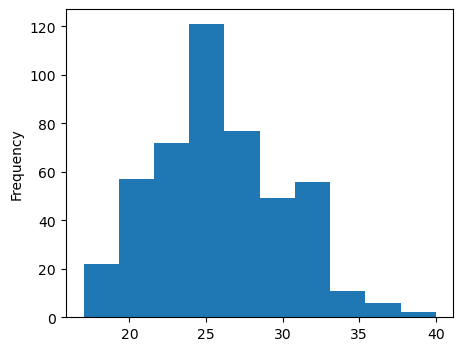

In [291]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from matplotlib import rcParams
%matplotlib inline

Age = df_player['Age']
rcParams['figure.figsize'] = 5,4

Age.plot(kind='hist')
plt.show()

##### With Seaborn

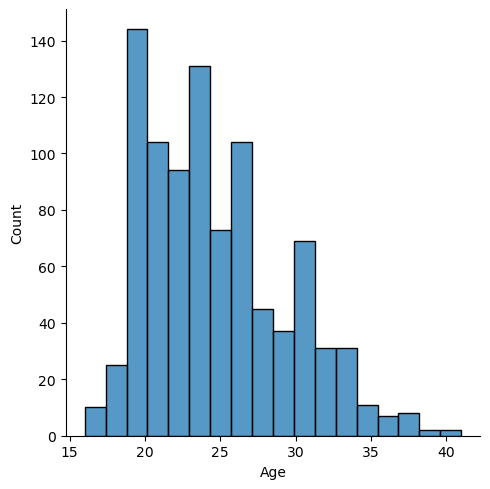

In [111]:
sns.displot(Age)
plt.show()

In [107]:
age_count = df_player['Age'].value_counts().reset_index()
age_count.columns = ['Age', 'Player Count']
age_count.sort_values('Age', ascending=True)

,Age,Player Count
22,16,2
17,17,8
14,18,25
6,19,59
2,20,85
0,21,104
1,22,94
4,23,68
5,24,63
3,25,73


##### The histograms show that the majority of players in the Premier League are between 19-25 years of age. The table above further confirms this.

#### The following age distribution and the remainder of this analysis will look at players that have made at least one appearance to provide a more accurate understanding of player performance

In [117]:
df_player = df_player[df_player['Appearances']>0]
df_player.sort_values(by='Appearances', ascending=False).head(25)

,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
909,Andy Robertson,30,Scotland,Liverpool,Defender,275.0,3.0,157.0,58.0,78.0,273.0,425.0,64%,4.0,35.0,264.0,475.0,201.0,6.0,"1,551",861.0,794.0,170.0,182.0,171.0,0.0,2.0,59.0,"15,868",57.70,80.0,"1,502",22%,15.0,562.0,2.0,0.0,9.0,3.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,Kepa,30,Spain,Real Madrid,Goalkeeper,109.0,0.0,50.0,35.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Max Aarons,24,England,Bournemouth,Defender,90.0,0.0,12.0,62.0,10.0,174.0,141.0,66%,1.0,13.0,73.0,165.0,63.0,4.0,407.0,404.0,383.0,96.0,41.0,111.0,1.0,0.0,4.0,"2,887",32.08,10.0,136.0,21%,7.0,94.0,16.0,0.0,68.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,Matheus Nunes,26,Portugal,Manchester City,Midfielder,53.0,1.0,25.0,21.0,NaN,NaN,80.0,60%,NaN,12.0,23.0,41.0,21.0,NaN,194.0,245.0,232.0,64.0,29.0,9.0,NaN,1.0,3.0,"1,496",28.23,4.0,65.0,25%,7.0,85.0,2.0,2.0,46.0,7.0,0.0,1.0,0.0,2.0,0.02,0.0,0.0,38.0,13.0,34%,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,Aaron Connolly,24,Ireland,NaN,Forward,45.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.00,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Joachim Andersen,28,Denmark,Crystal Palace,Defender,38.0,2.0,13.0,15.0,8.0,58.0,56.0,63%,0.0,5.0,40.0,202.0,109.0,0.0,193.0,181.0,107.0,14.0,90.0,47.0,0.0,1.0,3.0,"2,151",56.61,4.0,31.0,32%,6.0,202.0,7.0,0.0,43.0,1.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933,William Saliba,23,France,Arsenal,Defender,38.0,2.0,28.0,5.0,18.0,29.0,41.0,63%,4.0,4.0,29.0,78.0,46.0,0.0,213,139.0,94.0,10.0,72.0,49.0,0.0,0.0,1.0,"2,839",74.71,0.0,3,33%,3.0,68.0,4.0,0.0,22.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,Declan Rice,25,England,Arsenal,Midfielder,38.0,7.0,28.0,5.0,NaN,NaN,83.0,61%,NaN,23.0,44.0,51.0,29.0,NaN,178.0,156.0,143.0,21.0,39.0,46.0,NaN,0.0,8.0,"2,227",58.61,9.0,60.0,35%,2.0,78.0,5.0,0.0,34.0,2.0,2.0,5.0,0.0,2.0,0.18,0.0,0.0,58.0,20.0,34%,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,Carlton Morris,29,England,NaN,Forward,38.0,11.0,6.0,24.0,NaN,NaN,15.0,NaN,NaN,12.0,1.0,53.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,718,18.89,5.0,15.0,NaN,NaN,NaN,4.0,0.0,49.0,9.0,2.0,9.0,0.0,4.0,0.29,5.0,0.0,71.0,31.0,44%,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,Bernd Leno,32,Germany,Fulham,Goalkeeper,38.0,0.0,13.0,17.0,10.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,"1,406",37.00,NaN,NaN,NaN,NaN,176.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,0.0,18.0,16.0,8.0,19.0,167.0,201.0


In [127]:
df_player['Club'].value_counts()

Club
Chelsea                    27
Liverpool                  26
Aston Villa                23
Arsenal                    22
Wolverhampton Wanderers    20
Brentford                  20
Brighton & Hove Albion     19
Newcastle United           19
Tottenham Hotspur          19
Bournemouth                18
Manchester United          18
Crystal Palace             17
Nottingham Forest          17
West Ham United            16
Manchester City            16
Fulham                     15
Everton                    12
Sevilla                     2
Southampton                 2
Leeds United                1
Leicester City              1
Rangers                     1
Burnley                     1
Luton Town                  1
Real Madrid                 1
Huddersfield Town           1
Ipswich Town                1
Portsmouth                  1
Name: count, dtype: int64

##### Some of the teams listed above were not in the Premier League for the 2023/2024 season and other teams are not in England at all. I will reference the official Premier League website to determine where these players played during that season and make the corrections to their club data. Those that were under Premier League teams and were on loan to teams outside of the league will be removed from the dataset

In [138]:
player_names = df_player[df_player['Club'].isin(['Sevilla', 'Southampton', 'Leeds United', 'Leicester City', 'Rangers', 'Real Madrid', 'Huddersfield Town', 'Ipswich Town', 'Portsmouth'])]['Name'].tolist()

['Kepa']

In [158]:
# Change club name to the correct club name
df_player.loc[df_player['Name'] == 'Alejo Véliz', ['Club']] = ['Tottenham Hotspur']
df_player.loc[df_player['Name'] == 'Ben Brereton', ['Club']] = ['Sheffield United']
df_player.loc[df_player['Name'] == 'Thomas Cannon', ['Club']] = ['Everton']
df_player.loc[df_player['Name'] == 'Fábio Silva', ['Club']] = ['Wolverhampton Wanderers']
df_player.loc[df_player['Name'] == 'Alex Matos', ['Club']] = ['Chelsea']
df_player.loc[df_player['Name'] == 'Hannibal Mejbri', ['Club']] = ['Manchester United']
df_player.loc[df_player['Name'] == 'Arijanet Muric', ['Club']] = ['Burnley']
df_player.loc[df_player['Name'] == 'Myles Peart-Harris', ['Club']] = ['Brentford']
df_player.loc[df_player['Name'] == 'Adam Lallana', ['Club']] = ['Brighton & Hove Albion']
df_player.loc[df_player['Name'] == 'Carlton Morris', ['Club']] = ['Luton Town']

In [144]:
# Checking to make sure that clubs have been updated
df_player.query('Name == "Alex Matos" or Name == "Adam Lallana"')

,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
708,Alex Matos,20,England,Chelsea,Forward,1.0,0.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.00,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,Adam Lallana,36,England,Brighton & Hove Albion,Midfielder,25.0,0.0,7.0,8.0,NaN,NaN,8.0,38%,NaN,3.0,3.0,1.0,1.0,NaN,22.0,25.0,44.0,3.0,3.0,5.0,NaN,0.0,1.0,499,19.96,2.0,7.0,29%,3.0,3.0,2.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,18%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
player_names

['Kepa']

##### Kepa played the 2023/2024 season for Real Madrid. Thus, we will drop Kepa from the table.

In [141]:
df_player = df_player[df_player['Name'] != 'Kepa']

In [143]:
# Checking to ensure that Kepa has been removed.

df_player.query('Name == "Kepa"')

,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks


### Performing Age Distribution Analysis with filtered data.

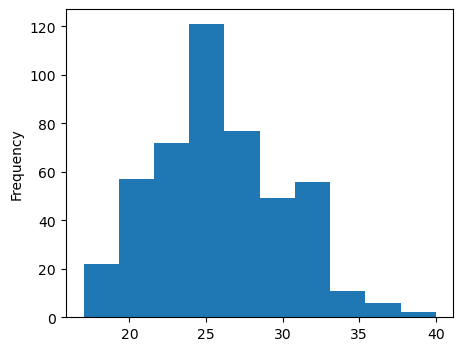

In [297]:
# With matplotlib
rcParams['figure.figsize']=5,4
Age = df_player['Age']
Age.plot(kind='hist')
plt.show()

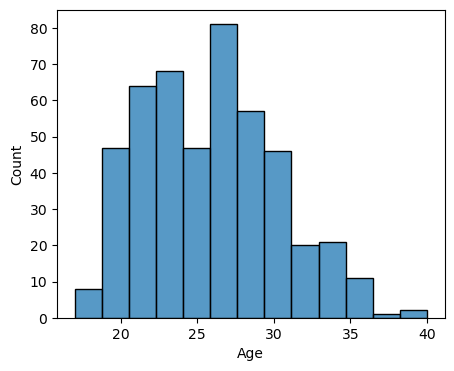

In [150]:
# With Seaborn
sns.histplot(Age)
plt.show()

In [151]:
age_count = df_player['Age'].value_counts().reset_index()
age_count.columns = ['Age', 'Player Count']
age_count.sort_values('Age', ascending=True)

,Age,Player Count
21,17,1
15,18,7
14,19,14
6,20,33
9,21,24
2,22,40
7,23,32
4,24,36
0,25,47
3,26,38


##### We see now that removing the players with 0 appearances has significantly changed, with most players being between 24 and 27 years of age as shown in the histograms and the table above. This is likely due to the fact that many of the younger players would have been on loan to other clubs outside of the Premier League.

##### There is still some additional data that needs to be cleaned and adjusted. For instance, players like Andy Robertson, Max Aarons, and Matheus Nunes have their career statistics listed instead of the 2023/2024 season. This is easily understood as their appearances are considerably higher than the other players.

In [172]:
df_player.sort_values(by='Appearances', ascending=False).head(5)

# Aaron Connolly did not have any appearances during the 2023/2024 season.
df1 = df_player[df_player['Name'] != 'Aaron Connolly']
df1.sort_values(by='Appearances', ascending=False).head(3)


,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
909,Andy Robertson,30,Scotland,Liverpool,Defender,275.0,3.0,157.0,58.0,78.0,273.0,425.0,64%,4.0,35.0,264.0,475.0,201.0,6.0,"1,551",861.0,794.0,170.0,182.0,171.0,0.0,2.0,59.0,"15,868",57.70,80.0,"1,502",22%,15.0,562.0,2.0,0.0,9.0,3.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Max Aarons,24,England,Bournemouth,Defender,90.0,0.0,12.0,62.0,10.0,174.0,141.0,66%,1.0,13.0,73.0,165.0,63.0,4.0,407.0,404.0,383.0,96.0,41.0,111.0,1.0,0.0,4.0,"2,887",32.08,10.0,136.0,21%,7.0,94.0,16.0,0.0,68.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,Matheus Nunes,26,Portugal,Manchester City,Midfielder,53.0,1.0,25.0,21.0,NaN,NaN,80.0,60%,NaN,12.0,23.0,41.0,21.0,NaN,194.0,245.0,232.0,64.0,29.0,9.0,NaN,1.0,3.0,"1,496",28.23,4.0,65.0,25%,7.0,85.0,2.0,2.0,46.0,7.0,0.0,1.0,0.0,2.0,0.02,0.0,0.0,38.0,13.0,34%,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
defend_names = ['Andy Robertson', 'Max Aarons']

defend_names_values = {
    'Andy Robertson': [23, 3, 14, 4, 2, 22, 35, 69, 0, 3, 13, 34, 14, 1, 104, 59, 55, 5, 14, 13, 0, 0, 2, 1244, 54.09, 10, 184, 0.30, 0, 47, 2, 0, 9, 3, 0, 1, 2, 0],
    'Max Aarons': [20, 0, 4, 12, 1, 34, 29, 0.66, 0, 1, 8, 21, 3, 0, 75, 74, 57, 14, 5, 11, 0, 0, 1, 451, 22.55, 1, 13, 0.23, 2, 20, 1, 0, 12, 2, 0, 0, 0, 0]
}

for name in defend_names:
    df1.loc[df1['Name'] == name, ['Appearances', 'Goals', 'Wins', 'Losses', 'Clean sheets', 'Goals Conceded', 'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances', 'Header Clearance', 'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists', 'Passes', 'Passes per match', 'Big Chances Created', 'Crosses', 'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Headed goals', 'Goals with right foot', 'Goals with left foot', 'Hit woodwork']] = defend_names_values[name]

df1.query('Name == "Andy Robertson"')


,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Clearnaces,Header Clearances,Duels Won,Header clearances,Header Clearance
909,Andy Robertson,30,Scotland,Liverpool,Defender,23.0,3.0,14.0,4.0,2.0,22.0,35.0,69,0.0,3.0,13.0,34.0,201.0,1.0,104,59.0,55.0,5.0,14.0,13.0,0.0,0.0,2.0,1244,54.09,10.0,184,0.3,0.0,47.0,2.0,0.0,9.0,3.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,14.0,59.0,14.0,14.0


In [202]:
df2 = df1.iloc[:,:-5]

In [208]:
df2.loc[df2['Name'] == 'Max Aarons', ['Tackle success %', 'Headed Clearance', 'Cross accuracy %']] = ['66%', 3, '23%']
df2.loc[df2['Name'] == 'Andy Robertson', ['Tackle success %', 'Headed Clearance', 'Cross accuracy %']] = ['69%', 14, '30%']

In [219]:
df2.loc[df2['Name'] == 'Matheus Nunes', ['Appearances', 'Goals', 'Wins', 'Losses', 'Tackles', 'Tackle success %', 'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance', 'Recoveries', 'Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists', 'Passes', 'Passes per match', 'Big Chances Created', 'Crosses', 'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Headed goals', 'Goals with right foot', 'Goals with left foot', 'Hit woodwork', 'Goals per match', 'Shots', 'Shots on target', 'Shooting accuracy %', 'Big chances missed']] = [19, 0, 14, 5, 13, '38%', 2, 7, 9, 6, 40, 63, 66, 20, 7, 9, 0, 1, 2, 522, 22.47, 22, '32%', 1, 4, 0, 1, 9, 5, 0, 0, 0, 1, 0, 0, 10, 4, '40%', 2]

### Analyzing Goals and Assists

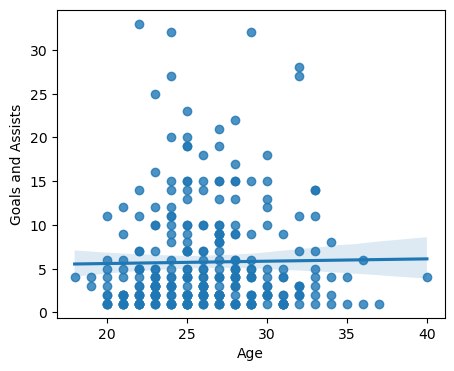

In [236]:
df_goal_assist = df2[['Name', 'Age', 'Goals', 'Assists']].copy()
df_goal_assist['Goals and Assists'] = df2['Goals'] + df2['Assists']
df_goal_assist = df_goal_assist[df_goal_assist['Goals and Assists']>0].sort_values(by='Goals and Assists', ascending=False)

x = df_goal_assist['Age']
y = df_goal_assist['Goals and Assists']

sns.regplot(x=x, y=y, data=df_goal_assist, scatter=True)
plt.show()



##### The scatterplot above shows that there isn't much of a relationship between Age and Goals and Assists. However, this scatterplot does highlight some strong potential among younger players, particularly, 3 players under the age of 25 with more than 25 goals and assists. Additionally, the scatterplot highlights the older players performing at a high level. This presents an opportunity to conduct further analysis to identify those players.

In [238]:
df_goal_assist.query('Age < 25 and `Goals and Assists` > 20')

,Name,Age,Goals,Assists,Goals and Assists
844,Cole Palmer,22,22.0,11.0,33.0
505,Erling Haaland,24,27.0,5.0,32.0
434,Phil Foden,24,19.0,8.0,27.0
932,Bukayo Saka,23,16.0,9.0,25.0


##### Cole Palmer is showing tremendous potential as his goal and assist contributions are already the highest in the Premier League despite his young age. 

In [239]:
df_goal_assist.query('Age > 31 and `Goals and Assists` > 10')

,Name,Age,Goals,Assists,Goals and Assists
752,Mohamed Salah,32,18.0,10.0,28.0
981,Son Heung-Min,32,17.0,10.0,27.0
339,Kevin De Bruyne,33,4.0,10.0,14.0
495,Pascal Groß,33,4.0,10.0,14.0
62,Jordan Ayew,33,4.0,7.0,11.0
943,Pablo Sarabia,32,4.0,7.0,11.0


##### Despite being in the later stages of their careers, players like Mohamed Salah and Song Heung-Min are still providing tremendous value to their respective teams.

## Defensive Forwards
#### Forwards, whether wingers or strikers, are known for their ability to generate goals, cross the ball into the box, and slashing inside by running behind the defensive line in a variety of ways. However, forwards are generally not known for their defensive capabilities. The following analysis will look at forwards that are exceptional defensively.

In [274]:
def_forwards = df2[df2['Position'] == 'Forward']
def_forwards = def_forwards[['Name', 'Tackles', 'Blocked shots', 'Interceptions']]

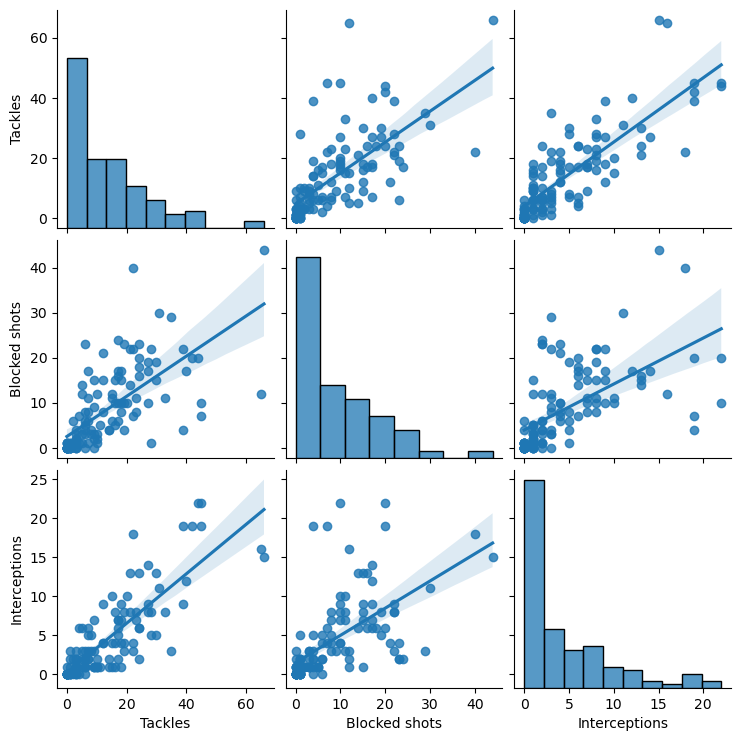

In [272]:
x = def_forwards[['Tackles', 'Blocked shots', 'Interceptions']]
sns.pairplot(x, kind='reg')
plt.show()

##### The above pairplot highlights somewhat of a positive correlation between each of the three defensive variables: Tackles, Blocked Shots, and Interceptions. In that, players that excel in tackles in one variable also tend to excel in other variables. The pairplot also shows us that there are some forwards that were performing exceptionally well defensively

In [275]:
def_forwards.describe()

,Tackles,Blocked shots,Interceptions
count,120.000000,120.00000,120.000000
mean,13.483333,8.55000,4.483333
std,13.582603,8.94601,5.221132
min,0.000000,0.00000,0.000000
25%,3.000000,1.00000,1.000000
50%,9.000000,6.00000,2.500000
75%,20.250000,15.00000,7.000000
max,66.000000,44.00000,22.000000


In [281]:
def_forwards['total_def'] = def_forwards['Tackles'] + def_forwards['Blocked shots'] + def_forwards['Interceptions']
def_forwards.sort_values(by='total_def', ascending=False).head(15)
#def_forwards.query('Tackles > 20.25 or `Blocked shots` > 15 or Interceptions > 7').sort_values(by='Blocked shots', ascending=False)

,Name,Tackles,Blocked shots,Interceptions,total_def
932,Bukayo Saka,66.0,44.0,15.0,125.0
62,Jordan Ayew,65.0,12.0,16.0,93.0
733,Dwight McNeil,44.0,20.0,22.0,86.0
243,Jarrod Bowen,42.0,20.0,19.0,81.0
461,Alejandro Garnacho,22.0,40.0,18.0,80.0
841,Dango Ouattara,45.0,10.0,22.0,77.0
579,João Pedro,31.0,30.0,11.0,72.0
9,Simon Adingra,45.0,7.0,19.0,71.0
368,Jérémy Doku,39.0,22.0,9.0,70.0
48,Antony,40.0,17.0,12.0,69.0


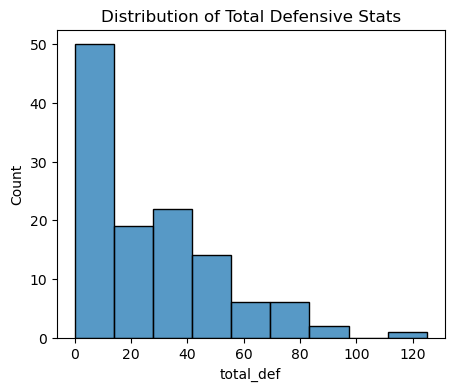

In [304]:
total_def = def_forwards['total_def']
rcParams['figure.figsize'] = 5,4
plt.title('Distribution of Total Defensive Stats')
sns.histplot(total_def)
plt.show()

##### Interestingly, it seems that the best defensive forward for the 2023/2024 season would be Bukayo Saka, as he leads all the forwards in two variables. Looking at the histogram above, he sits on a level of his own. Jordan Ayew, Dwight McNeil, Jarrod Bowen, Alejandro Garnacho are also great defensive forwards as they have very well-rounded statistics for tackles, blocked shots, and interceptions.

In [306]:
df2.head(5)

,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,Max Aarons,24,England,Bournemouth,Defender,20.0,0.0,4.0,12.0,1.0,34.0,29.0,66%,0.0,1.0,8.0,21.0,3.0,0.0,75,74.0,57.0,14.0,5.0,11.0,0.0,0.0,1.0,451,22.55,1.0,13,23%,2.0,20.0,1.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Josh Acheampong,18,England,Chelsea,Defender,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tyler Adams,25,United States,Bournemouth,Midfielder,3.0,0.0,2.0,1.0,NaN,NaN,4.0,75%,NaN,0.0,4.0,2.0,2.0,NaN,7.0,11.0,4.0,2.0,2.0,3.0,NaN,0.0,0.0,69,23.00,0.0,1.0,0%,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tosin Adarabioyo,27,England,Chelsea,Defender,20.0,2.0,8.0,8.0,6.0,25.0,21.0,52%,0.0,2.0,25.0,80.0,47.0,0.0,43.0,83.0,51.0,1.0,57.0,28.0,0.0,0.0,0.0,"1,211",60.55,0.0,1.0,0%,1.0,72.0,2.0,0.0,10.0,0.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Elijah Adebayo,26,England,NaN,Forward,27.0,10.0,5.0,16.0,NaN,NaN,4.0,NaN,NaN,7.0,6.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,197,7.30,0.0,5.0,NaN,NaN,NaN,1.0,0.0,27.0,13.0,4.0,5.0,1.0,2.0,0.37,0.0,0.0,31.0,14.0,45%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aerial Threats

In [313]:
at = df2[['Name', 'Aerial battles won', 'Aerial battles lost', 'Headed goals']].copy()
at['Aerial Battle Success %'] = at['Aerial battles won']/(at['Aerial battles won'] + at['Aerial battles lost'])
at = at[at['Aerial Battle Success %'] != 1]
at = at.sort_values(by='Aerial Battle Success %', ascending=False)
at.head(10)

,Name,Aerial battles won,Aerial battles lost,Headed goals,Aerial Battle Success %
126,Lesley Ugochukwu,9.0,2.0,0.0,0.818182
136,Virgil van Dijk,140.0,32.0,1.0,0.813953
138,Raphaël Varane,21.0,5.0,1.0,0.807692
533,James Hill,4.0,1.0,0.0,0.800000
1114,Harry Maguire,69.0,19.0,1.0,0.784091
792,Moussa Niakhaté,16.0,5.0,0.0,0.761905
591,Willy Kambwala,6.0,2.0,0.0,0.750000
889,Jesurun Rak-Sakyi,3.0,1.0,0.0,0.750000
20,Kristoffer Ajer,65.0,23.0,1.0,0.738636
481,Joe Gomez,31.0,11.0,0.0,0.738095


##### While Lesley Ugochukwu has the highest Aerial Battle Success %, it's clear that Virgil van Dijk's sample size is significantly greater than Lesley's. While Lesley has 11 total aerial battles in total, Virgil has a total of 172 aerial battles with a success rate of approximately 81.4% and 1 headed goal to Lesley's 0.

## ML Model

##### Using the data we have, I will develop a machine learning model to predict goals.

In [318]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [316]:
df2.head()

,Name,Age,Nationality,Club,Position,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big Chances Created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,Max Aarons,24,England,Bournemouth,Defender,20.0,0.0,4.0,12.0,1.0,34.0,29.0,66%,0.0,1.0,8.0,21.0,3.0,0.0,75,74.0,57.0,14.0,5.0,11.0,0.0,0.0,1.0,451,22.55,1.0,13,23%,2.0,20.0,1.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Josh Acheampong,18,England,Chelsea,Defender,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.00,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tyler Adams,25,United States,Bournemouth,Midfielder,3.0,0.0,2.0,1.0,NaN,NaN,4.0,75%,NaN,0.0,4.0,2.0,2.0,NaN,7.0,11.0,4.0,2.0,2.0,3.0,NaN,0.0,0.0,69,23.00,0.0,1.0,0%,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tosin Adarabioyo,27,England,Chelsea,Defender,20.0,2.0,8.0,8.0,6.0,25.0,21.0,52%,0.0,2.0,25.0,80.0,47.0,0.0,43.0,83.0,51.0,1.0,57.0,28.0,0.0,0.0,0.0,"1,211",60.55,0.0,1.0,0%,1.0,72.0,2.0,0.0,10.0,0.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Elijah Adebayo,26,England,NaN,Forward,27.0,10.0,5.0,16.0,NaN,NaN,4.0,NaN,NaN,7.0,6.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,197,7.30,0.0,5.0,NaN,NaN,NaN,1.0,0.0,27.0,13.0,4.0,5.0,1.0,2.0,0.37,0.0,0.0,31.0,14.0,45%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
stats = ['Appearances', 'Duels won', 'Duels lost', 'Assists', 'Passes', 'Shots on target']

# This 'for' loop is used to remove any commas and percentages in the stats variables as well as converting everything in the goals column to float datatype 
# because it was causing an error.
for stat in stats:
    df2[stat] = df2[stat].replace(',', '', regex=True)
for stat in stats:
    df2[stat] = df2[stat].replace('%', '', regex=True).astype(float)

x = df2[stats].fillna(0)
y = df2['Goals'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=26)

goal = DecisionTreeClassifier()
goal.fit(x_train, y_train)

DecisionTreeClassifier()

##### The machine learning model is trained. Now, I will test the accuracy score.

In [375]:
y_predict = goal.predict(x_test)

model_accuracy = metrics.accuracy_score(y_test, y_predict)
model_accuracy = model_accuracy.round(2)*100

print(f"The model has {model_accuracy}% accuracy.")

The model has 47.0% accuracy.


##### This model did not provide an ideal accuracy. We can use this opportunity to try a linear regression model and calculate mean-squared error and r-squared score

In [355]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [376]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

lr_y_predict = lrmodel.predict(x_test)

m_s_e = mean_squared_error(y_test, lr_y_predict)
r2 = r2_score(y_test, lr_y_predict)

In [377]:
print(f"The Mean-Squared Value is {m_s_e}.")
print(f"The r^2 value is {r2}.")

The Mean-Squared Value is 3.1042162645659173.
The r^2 value is 0.8364749103570008.


##### On average, the model's prediction is off by approximately 3.10 goals in squared units. While this isn't perfect, it can be improved by tuning the variables we pass through the model. The R^2 value is approximately 83.65%, meaning that our model is able to explain about 83% of the variation in our dataset. It's performing well, but just like the mean squared value, there is room for improvement.